# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [99]:
# Import essential libraries for data manipulation and analysis

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [100]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()


market_id        created_at actual_delivery_time  store_primary_category  \
0          1  06-02-2015 22:24     06-02-2015 23:11                       4   
1          2  10-02-2015 21:49     10-02-2015 22:33                      46   
2          2  16-02-2015 00:11     16-02-2015 01:06                      36   
3          1  12-02-2015 03:36     12-02-2015 04:35                      38   
4          1  27-01-2015 02:12     27-01-2015 02:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  int64  
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  int64  
 11  total_busy_dashers        175777 non-null  int64  
 12  total_outstanding_orders  175777 non-null  int64  
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [102]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], dayfirst=True)
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], dayfirst=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [104]:
# Convert categorical features to category type
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [105]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time']-df['created_at']
df['time_taken'] = df['time_taken'].dt.total_seconds() / 60

In [106]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  time_taken  
0                        21     34.44        47.0  
1                         2     27.60        44.0  
2                        18     11.56        55.0  
3                         8     31.80        59.0  
4                         7      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [107]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_order'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.day_name().isin(['Saturday','Sunday']).astype(int).astype('category')
df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                        21     34.44        47.0             22         0  
1                         2     27.60        44.0             21         0  
2                        18     11.56        55.0              0         0  
3                         8     31.80        59.0              3         0  
4                         7      8.20        46.0              2         0

In [108]:
# Drop unnecessary columns
df1 = df.drop(columns=['created_at', 'actual_delivery_time', 
                      'min_item_price', 'max_item_price'])

In [109]:
df1.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0         1                      4              1            4      3441   
1         2                     46              2            1      1900   
2         2                     36              3            4      4771   
3         1                     38              1            1      1525   
4         1                     38              1            2      3620   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                     33                  14   
1                   1                      1                   2   
2                   3                      8                   6   
3                   1                      5                   6   
4                   2                      5                   5   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                        21     34.44        47.0             22         0  
1                         2     27.60        44.0             21         0  
2                        18     11.56        55.0              0         0  
3                         8     31.80        59.0              3         0  
4                         7      8.20        46.0              2         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [110]:
# Define target variable (y) and features (X)
y = df1.pop('time_taken')
X = df1


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [111]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)
.0

0.0

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140621, 12)
(35156, 12)
(140621,)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [113]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_var = ['market_id','store_primary_category','order_protocol','hour_of_order','isWeekend']
num_var = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

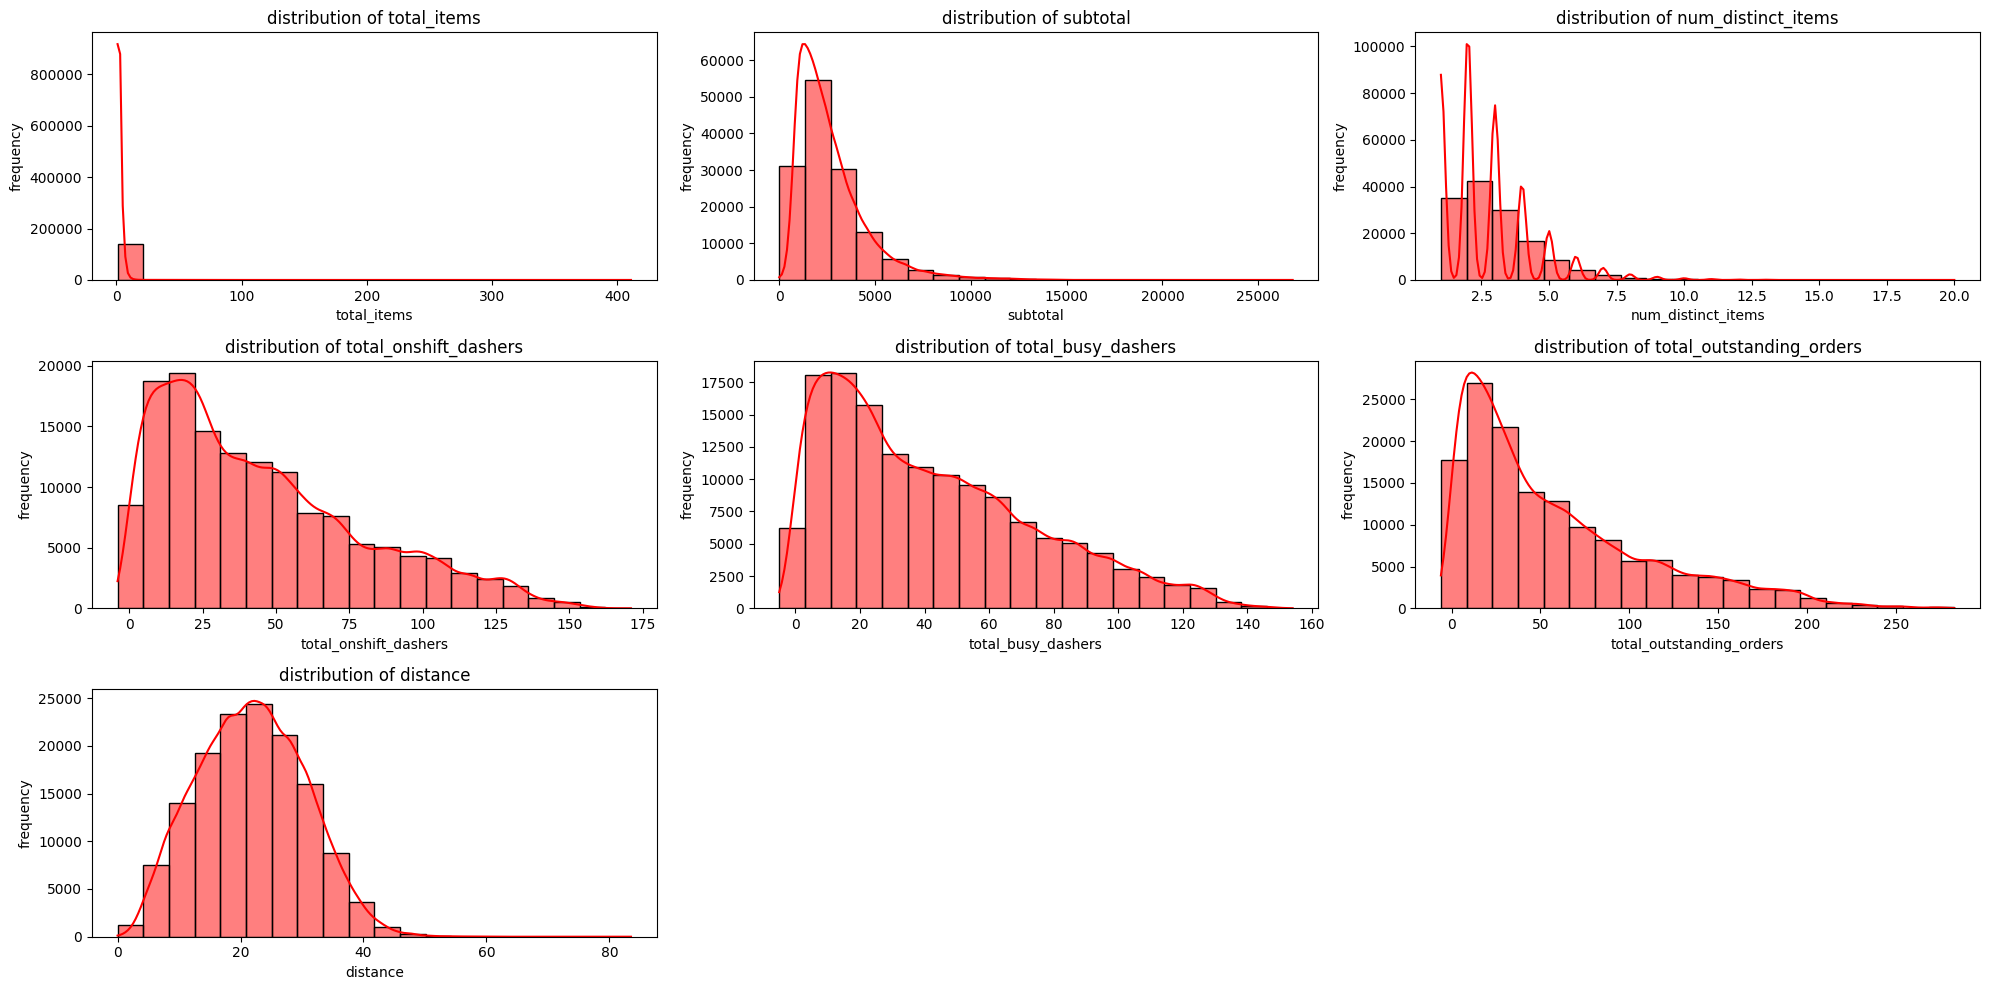

In [114]:
# Plot distributions for all numerical columns
plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_train[col], kde = True, bins = 20, color= 'red')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

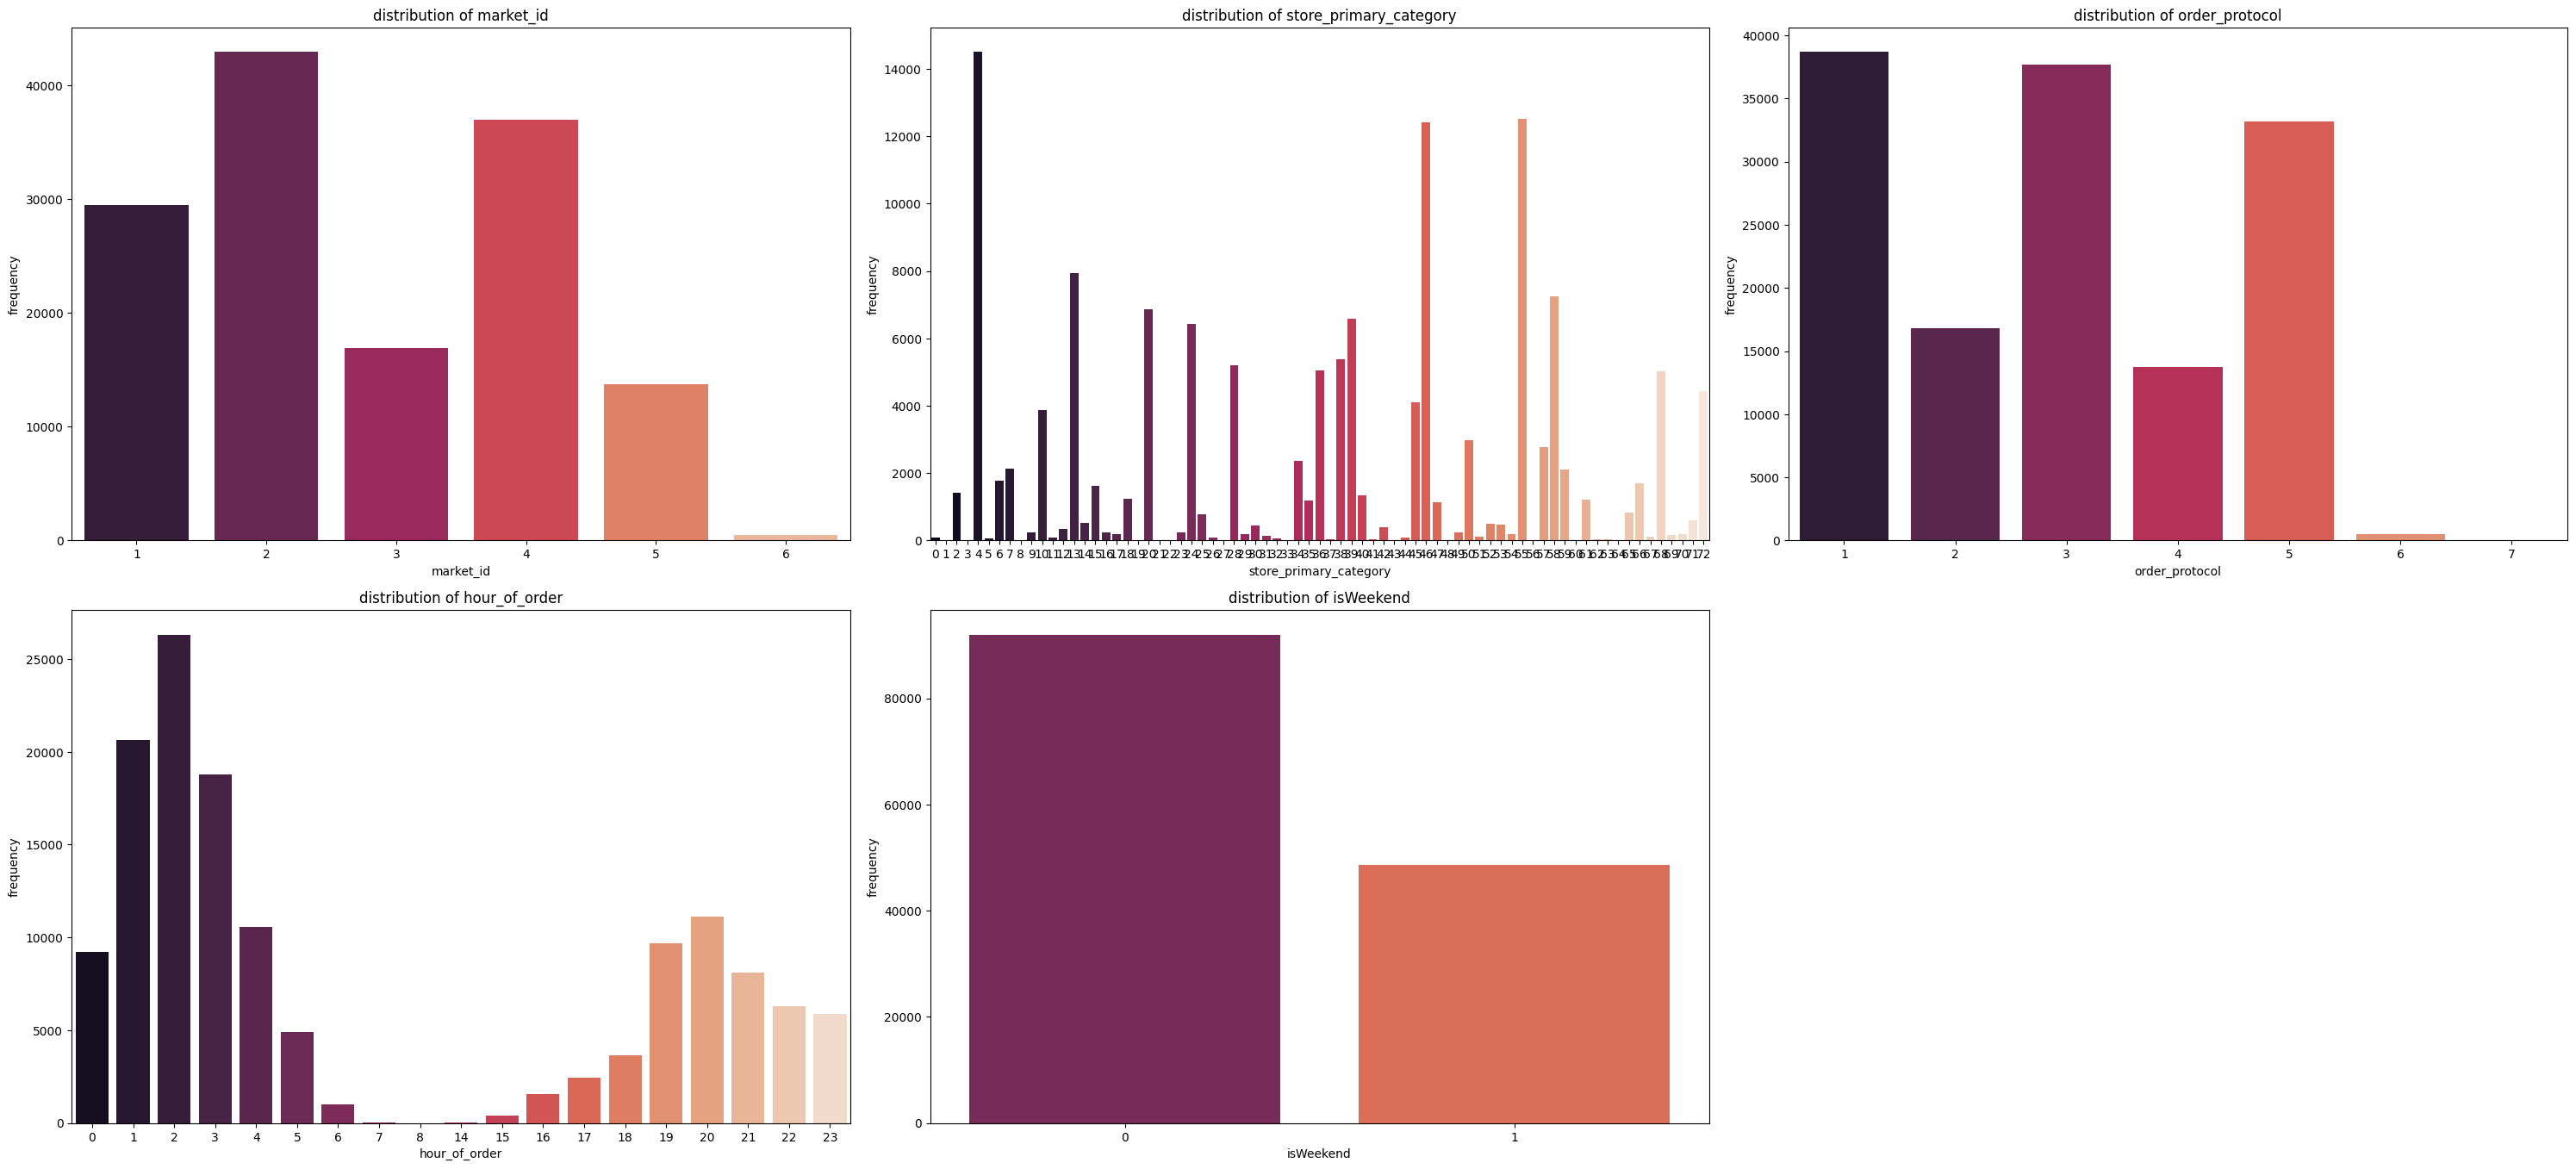

In [115]:
# Distribution of categorical columns

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_train, x=col, palette='rocket')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

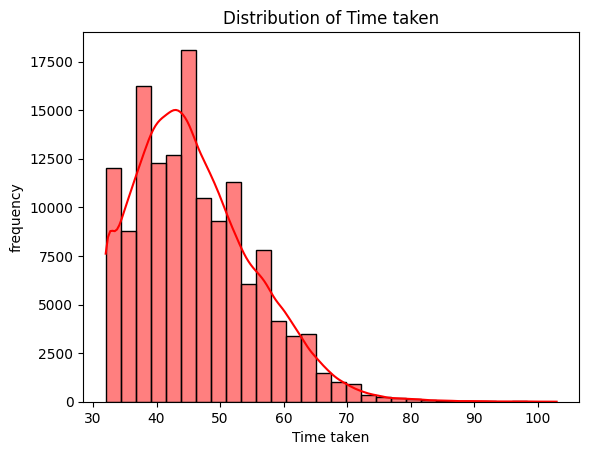

In [116]:
# Distribution of time_taken

sns.histplot(y_train, kde = True, bins = 30, color= 'red')
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

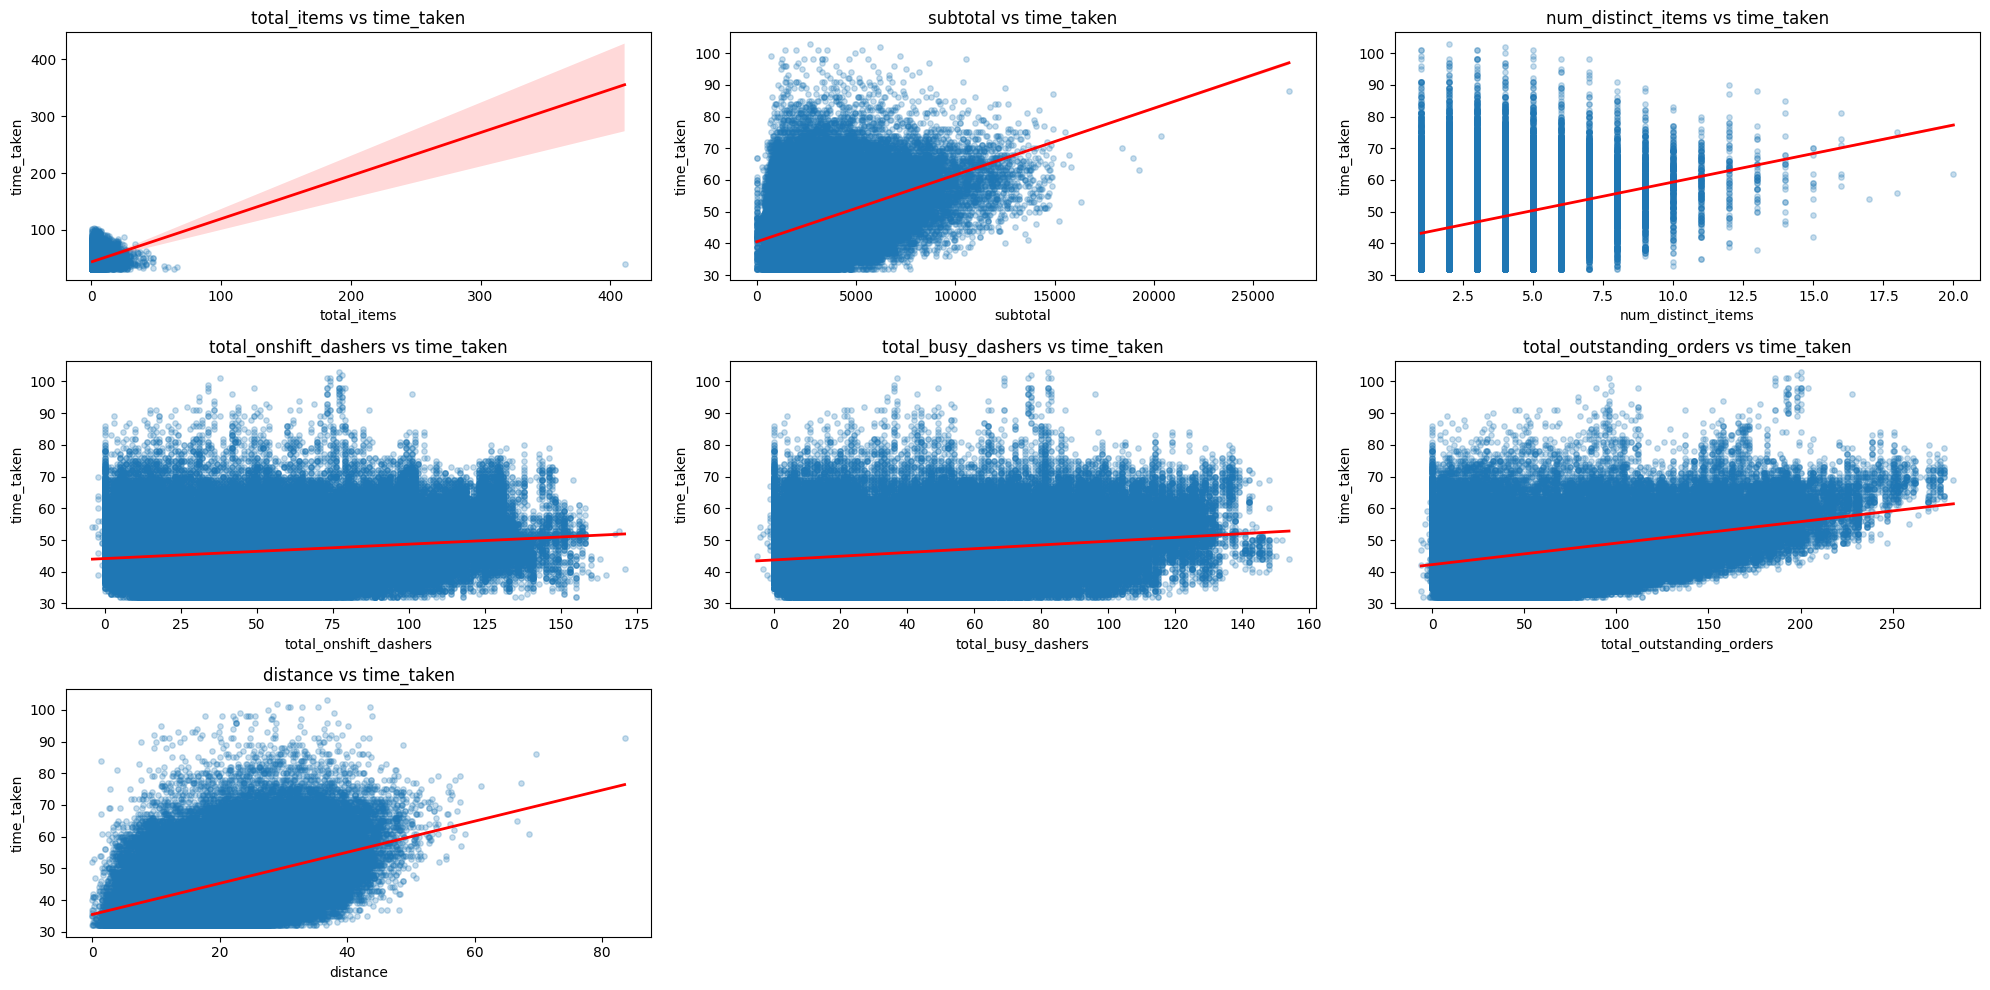

In [117]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

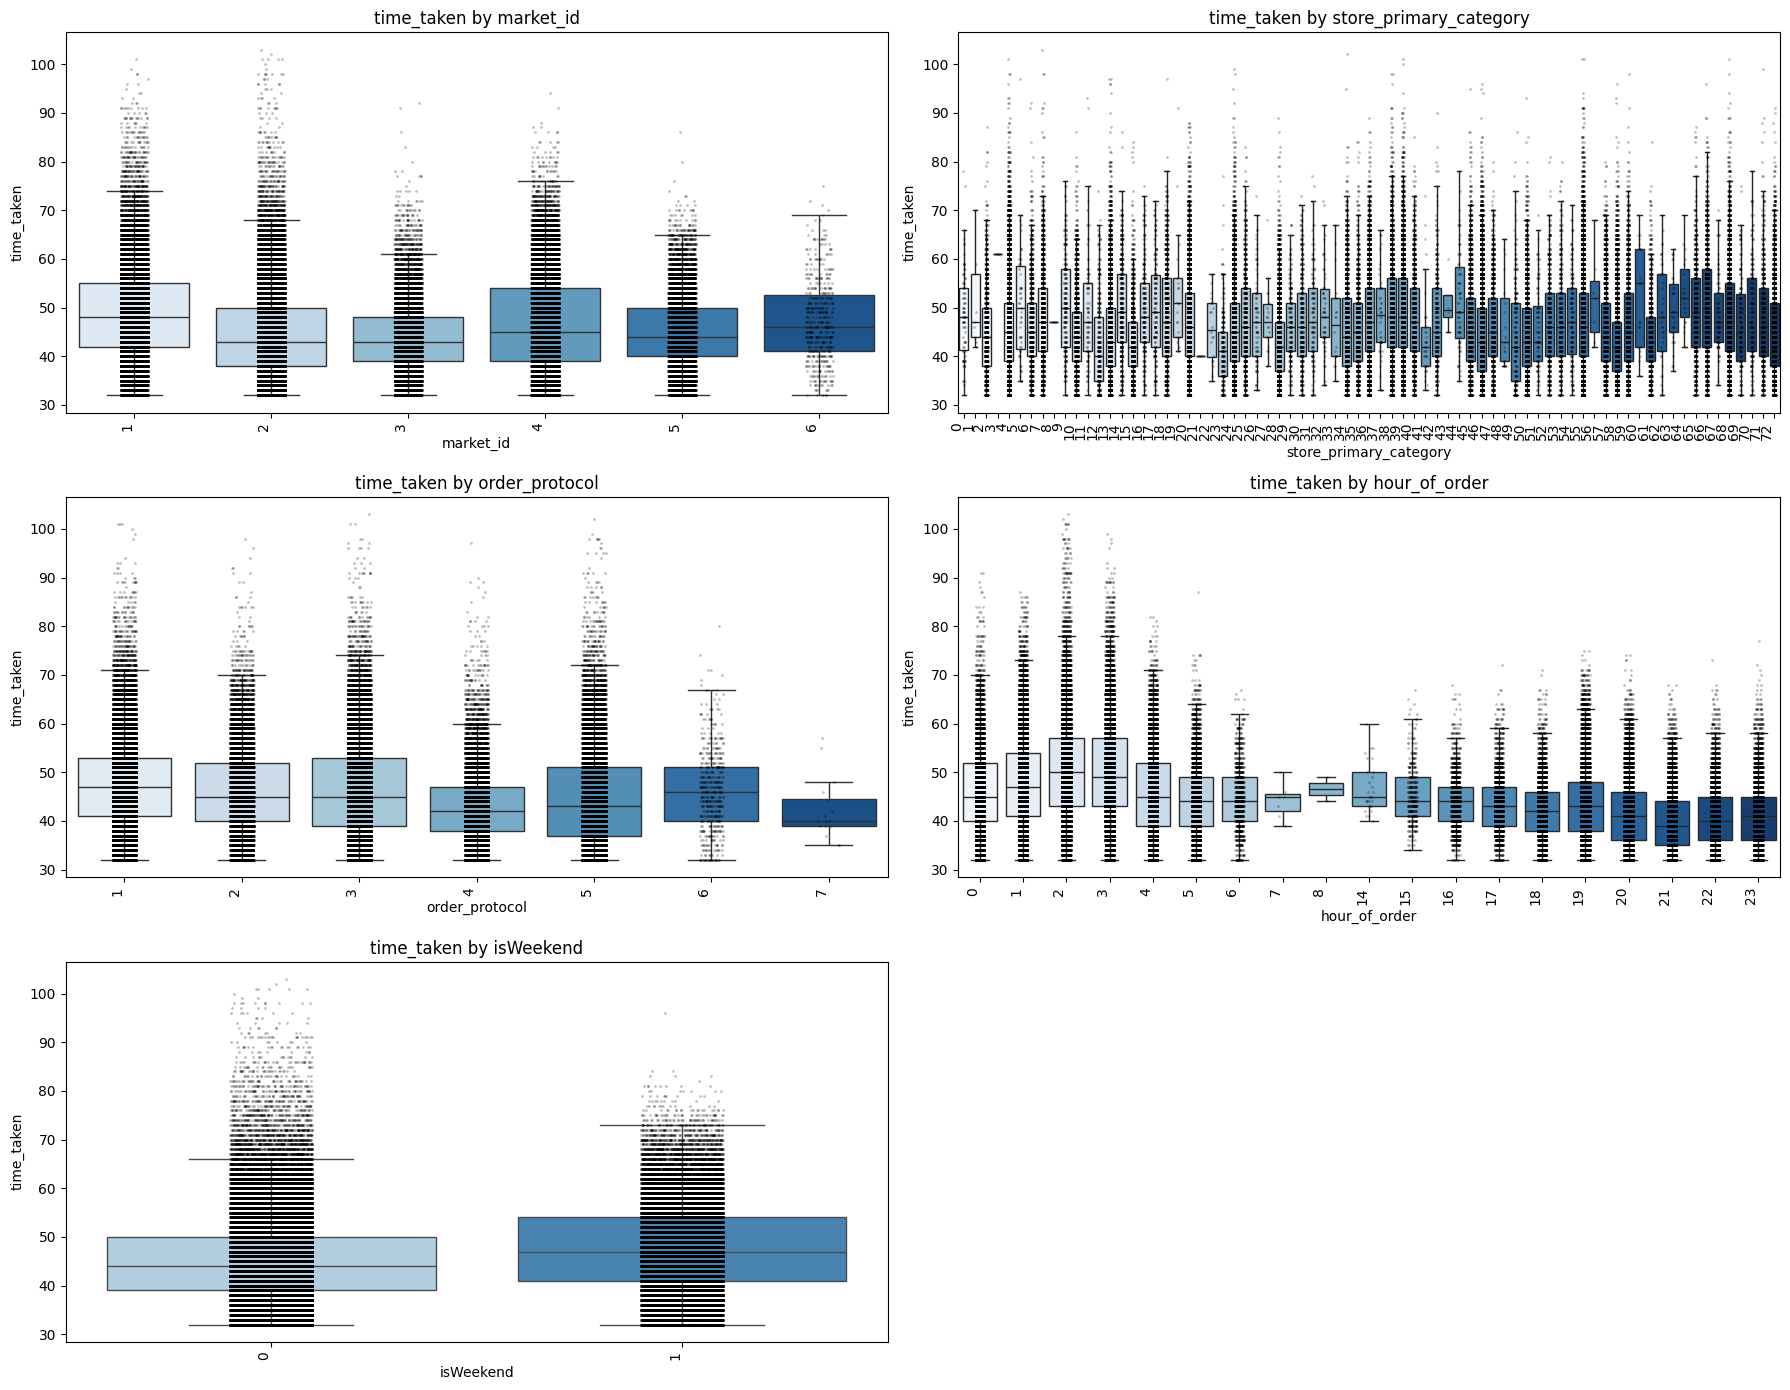

In [118]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(18, 14))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')
    
    # jittered points for extra insight
    sns.stripplot(x=X_train[col], y=y_train, alpha=0.25, color='black', size=2)
    
    plt.title(f'time_taken by {col}')
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

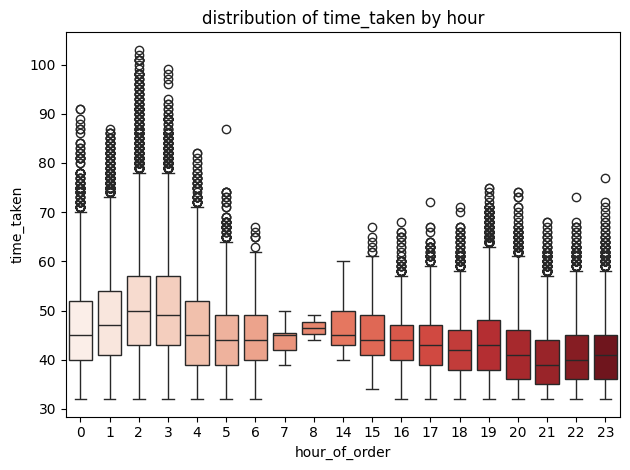

In [119]:
# Show the distribution of time_taken for different hours

sns.boxplot(x=X_train['hour_of_order'], y=y_train, palette='Reds')
plt.title(f'distribution of time_taken by hour')
plt.xlabel('hour_of_order')
plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [120]:
# Plot the heatmap of the correlation matrix
corr_matrix = X_train.copy()
corr_matrix['time_taken'] = y_train


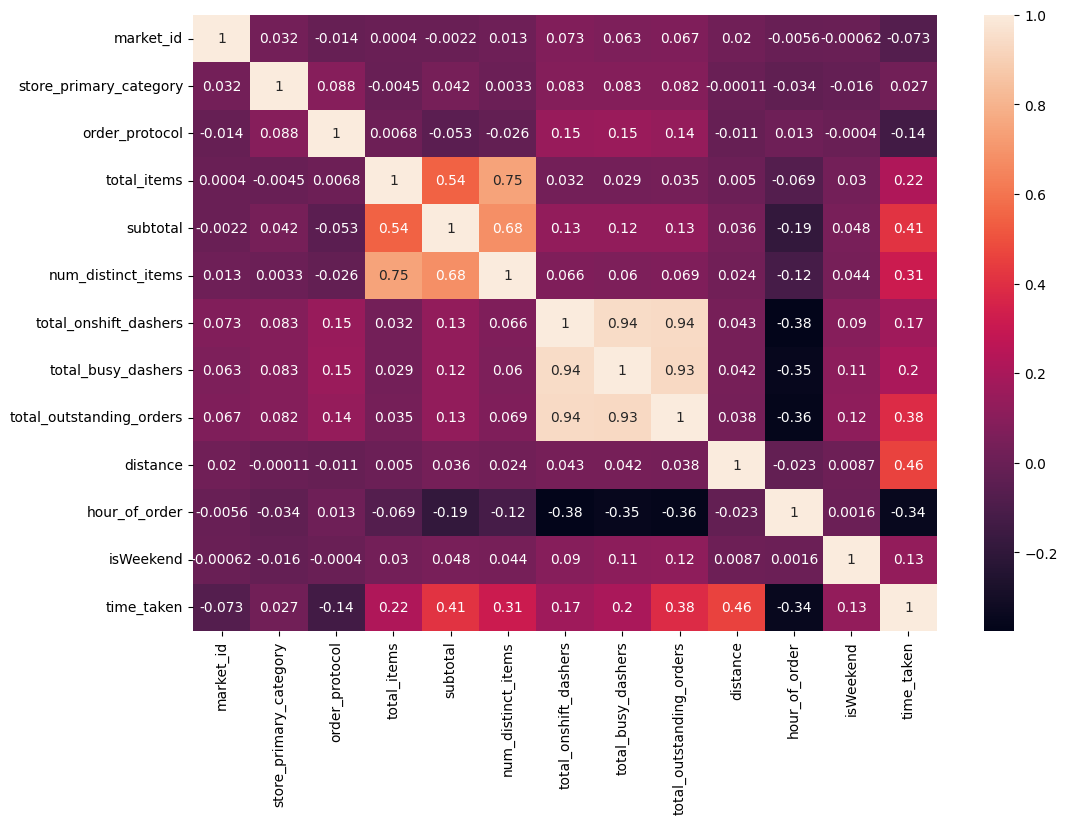

In [121]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.corr(),annot = True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [122]:
# Drop 3-5 weakly correlated columns from training dataset

weak_col = ['market_id', 'store_primary_category','order_protocol']
X_train = X_train.drop(columns = weak_col)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [123]:
# Boxplot for time_taken
train_box = X_train[num_var].copy()
train_box['time_taken'] = y_train


In [124]:
train_box.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1      1350                   1                     23   
58452             5      4285                   5                    112   
20644             6      7880                   3                     80   
79735             3      3660                   3                    127   
167933            5      8575                   5                     44   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  
42111                   20                        19      9.60        32.0  
58452                  100                       207     34.56        71.0  
20644                   79                       115     34.92        62.0  
79735                  106                       173     25.76        54.0  
167933                  44                        61     17.72        56.0

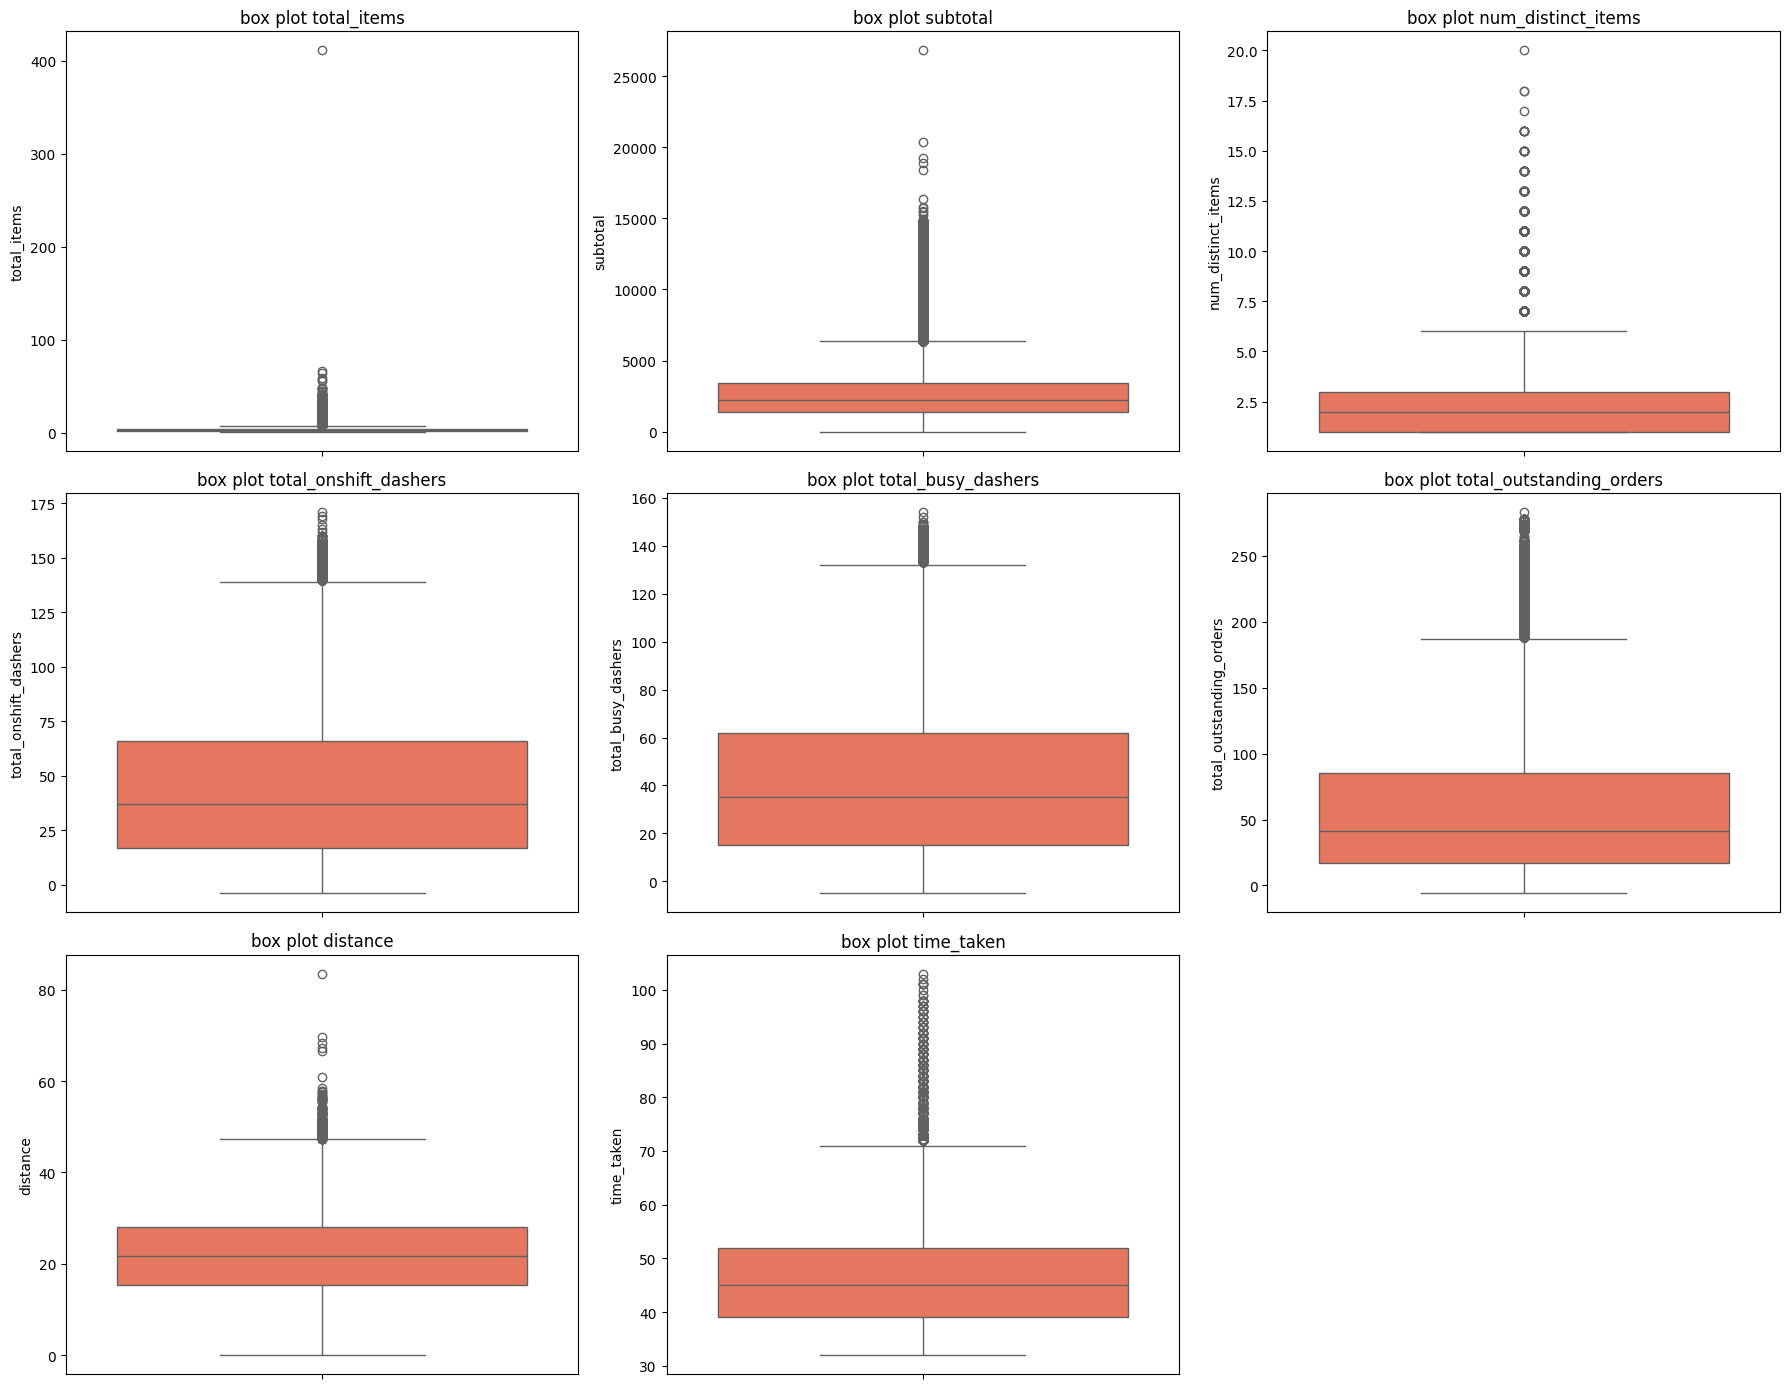

In [125]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(train_box.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_box[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [126]:
# Handle outliers
col_outlier = (['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers',
               'total_outstanding_orders','distance'])

upper_cap = {col: X_train[col].quantile(.99) for col in col_outlier}
upper_cap


{'total_items': 12.0,
 'subtotal': 9489.199999999953,
 'num_distinct_items': 8.0,
 'total_onshift_dashers': 136.0,
 'total_busy_dashers': 126.0,
 'total_outstanding_orders': 213.0,
 'distance': 41.84}

In [127]:
for col, upper in upper_cap.items():
    X_train[col] = X_train[col].clip(upper=upper)
X_train.describe()

total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        3.149295    2679.578914            2.656943   
std         2.151987    1748.937004            1.552343   
min         1.000000       0.000000            1.000000   
25%         2.000000    1415.000000            1.000000   
50%         3.000000    2220.000000            2.000000   
75%         4.000000    3407.000000            3.000000   
max        12.000000    9489.200000            8.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.866058           41.792172                 58.016726   
std                34.327508           31.969860                 51.966568   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           62.000000                 85.000000   
max               136.000000          126.000000                213.000000   

            distance  hour_of_order  
count  140621.000000  140621.000000  
mean       21.802641       8.473365  
std         8.668611       8.676889  
min         0.000000       0.000000  
25%        15.320000       2.000000  
50%        21.760000       3.000000  
75%        28.120000      19.000000  
max        41.840000      23.000000

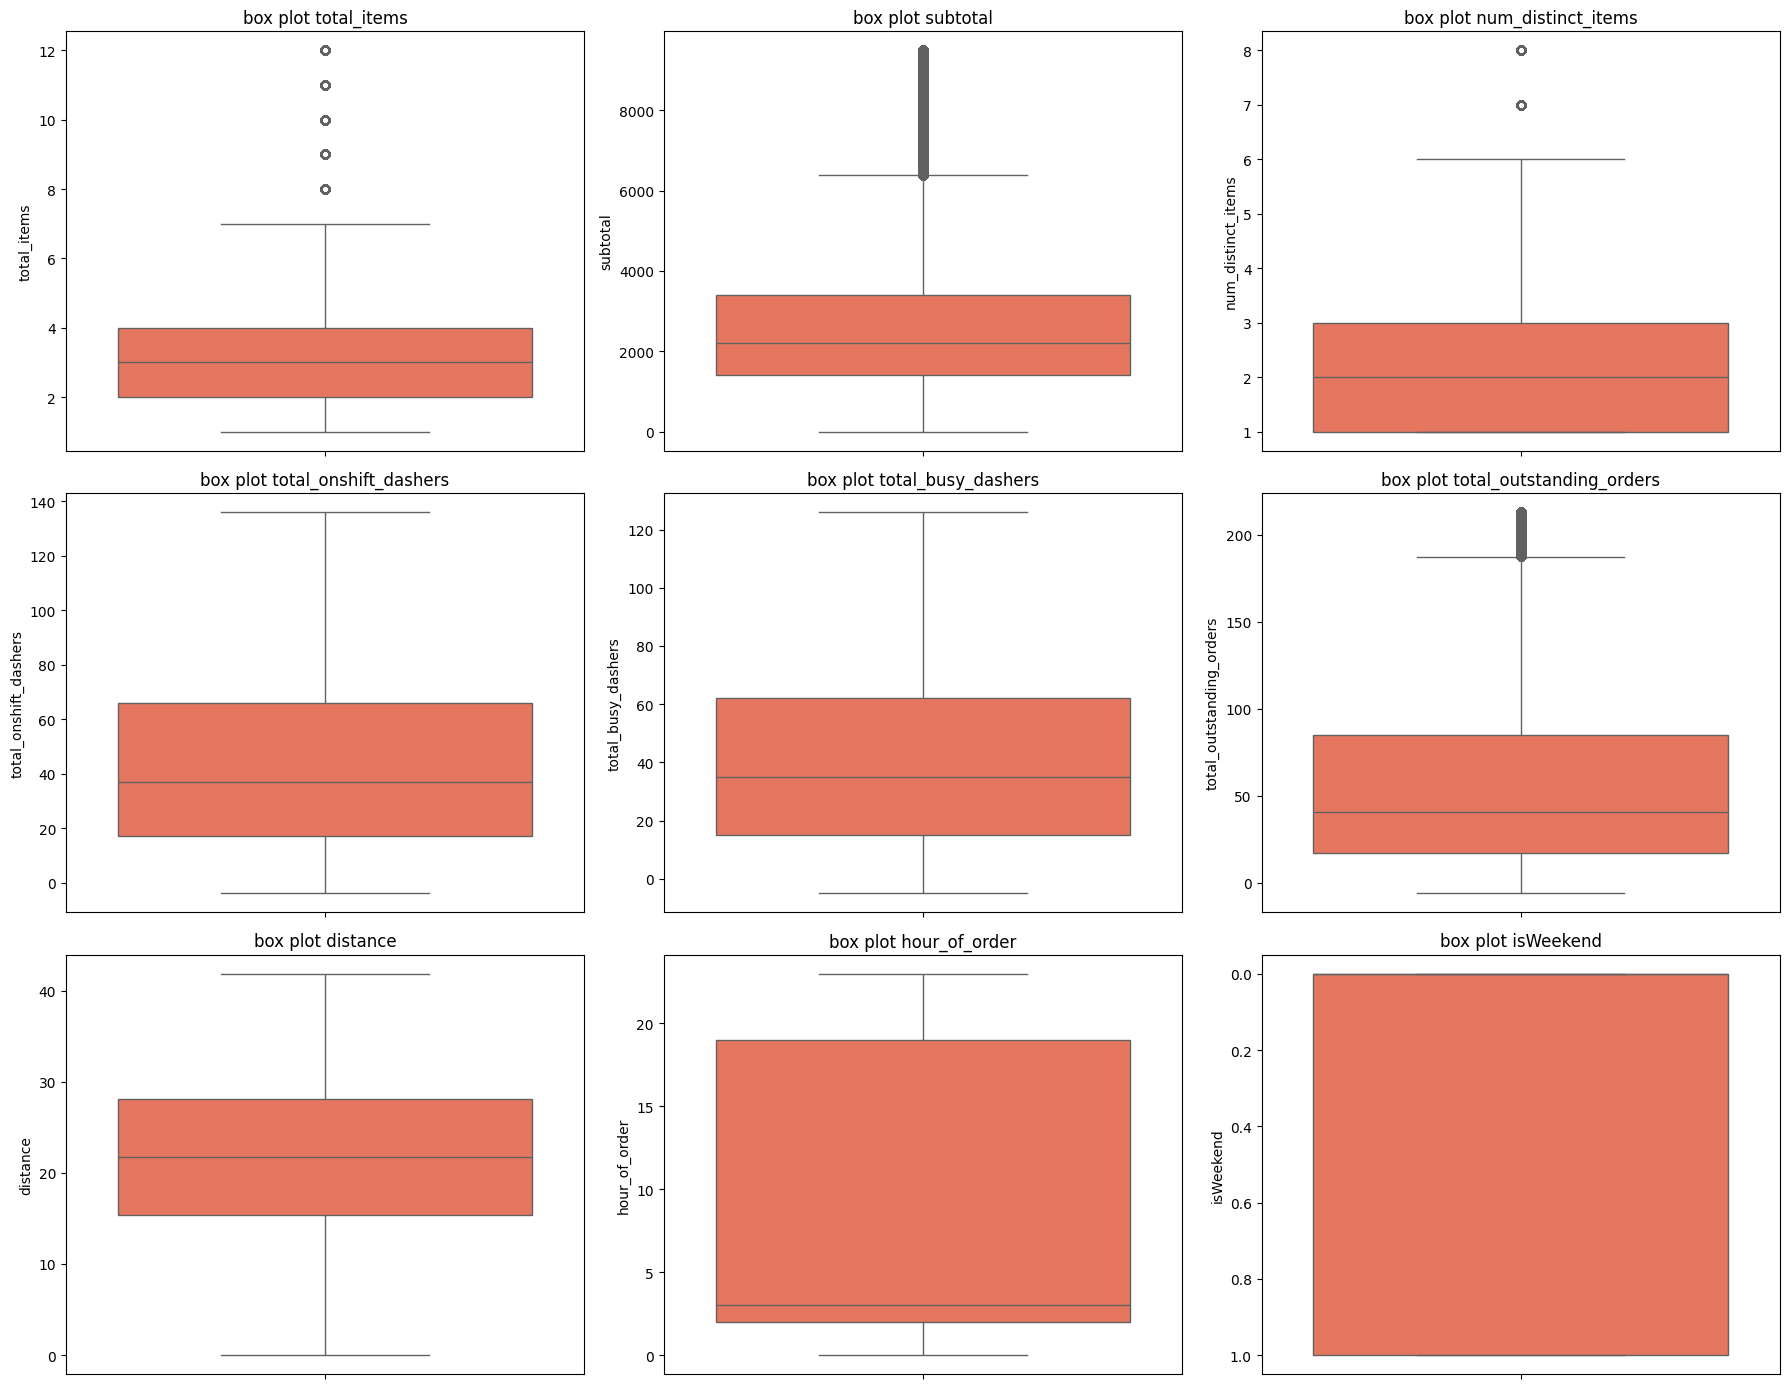

In [128]:
# checking after handelling outliers
plt.figure(figsize=(18, 14))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(X_train[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [129]:
# Define numerical and categorical columns for easy EDA and data manipulation

cat_var = ['market_id','store_primary_category','order_protocol','hour_of_order','isWeekend']
num_var = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

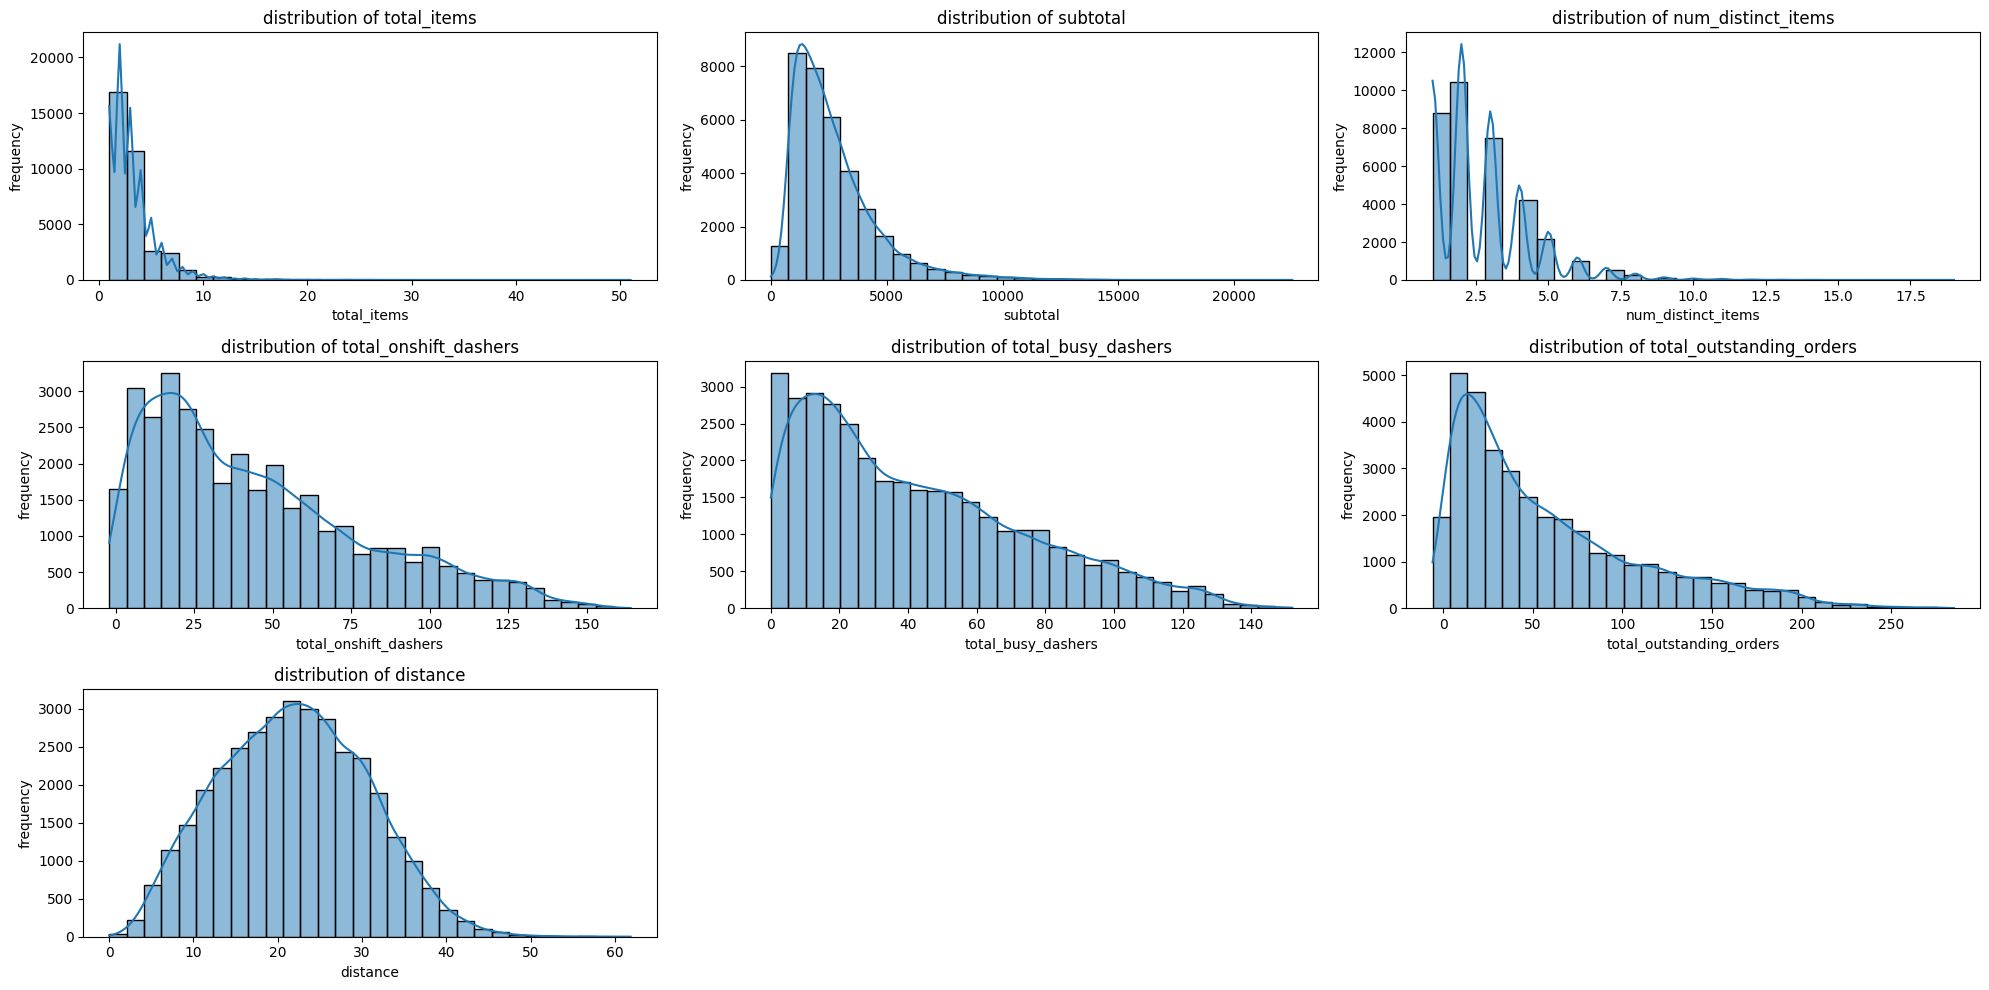

In [130]:
# Plot distributions for all numerical columns
plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_test[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()


##### **4.1.2**
Check the distribution of categorical features

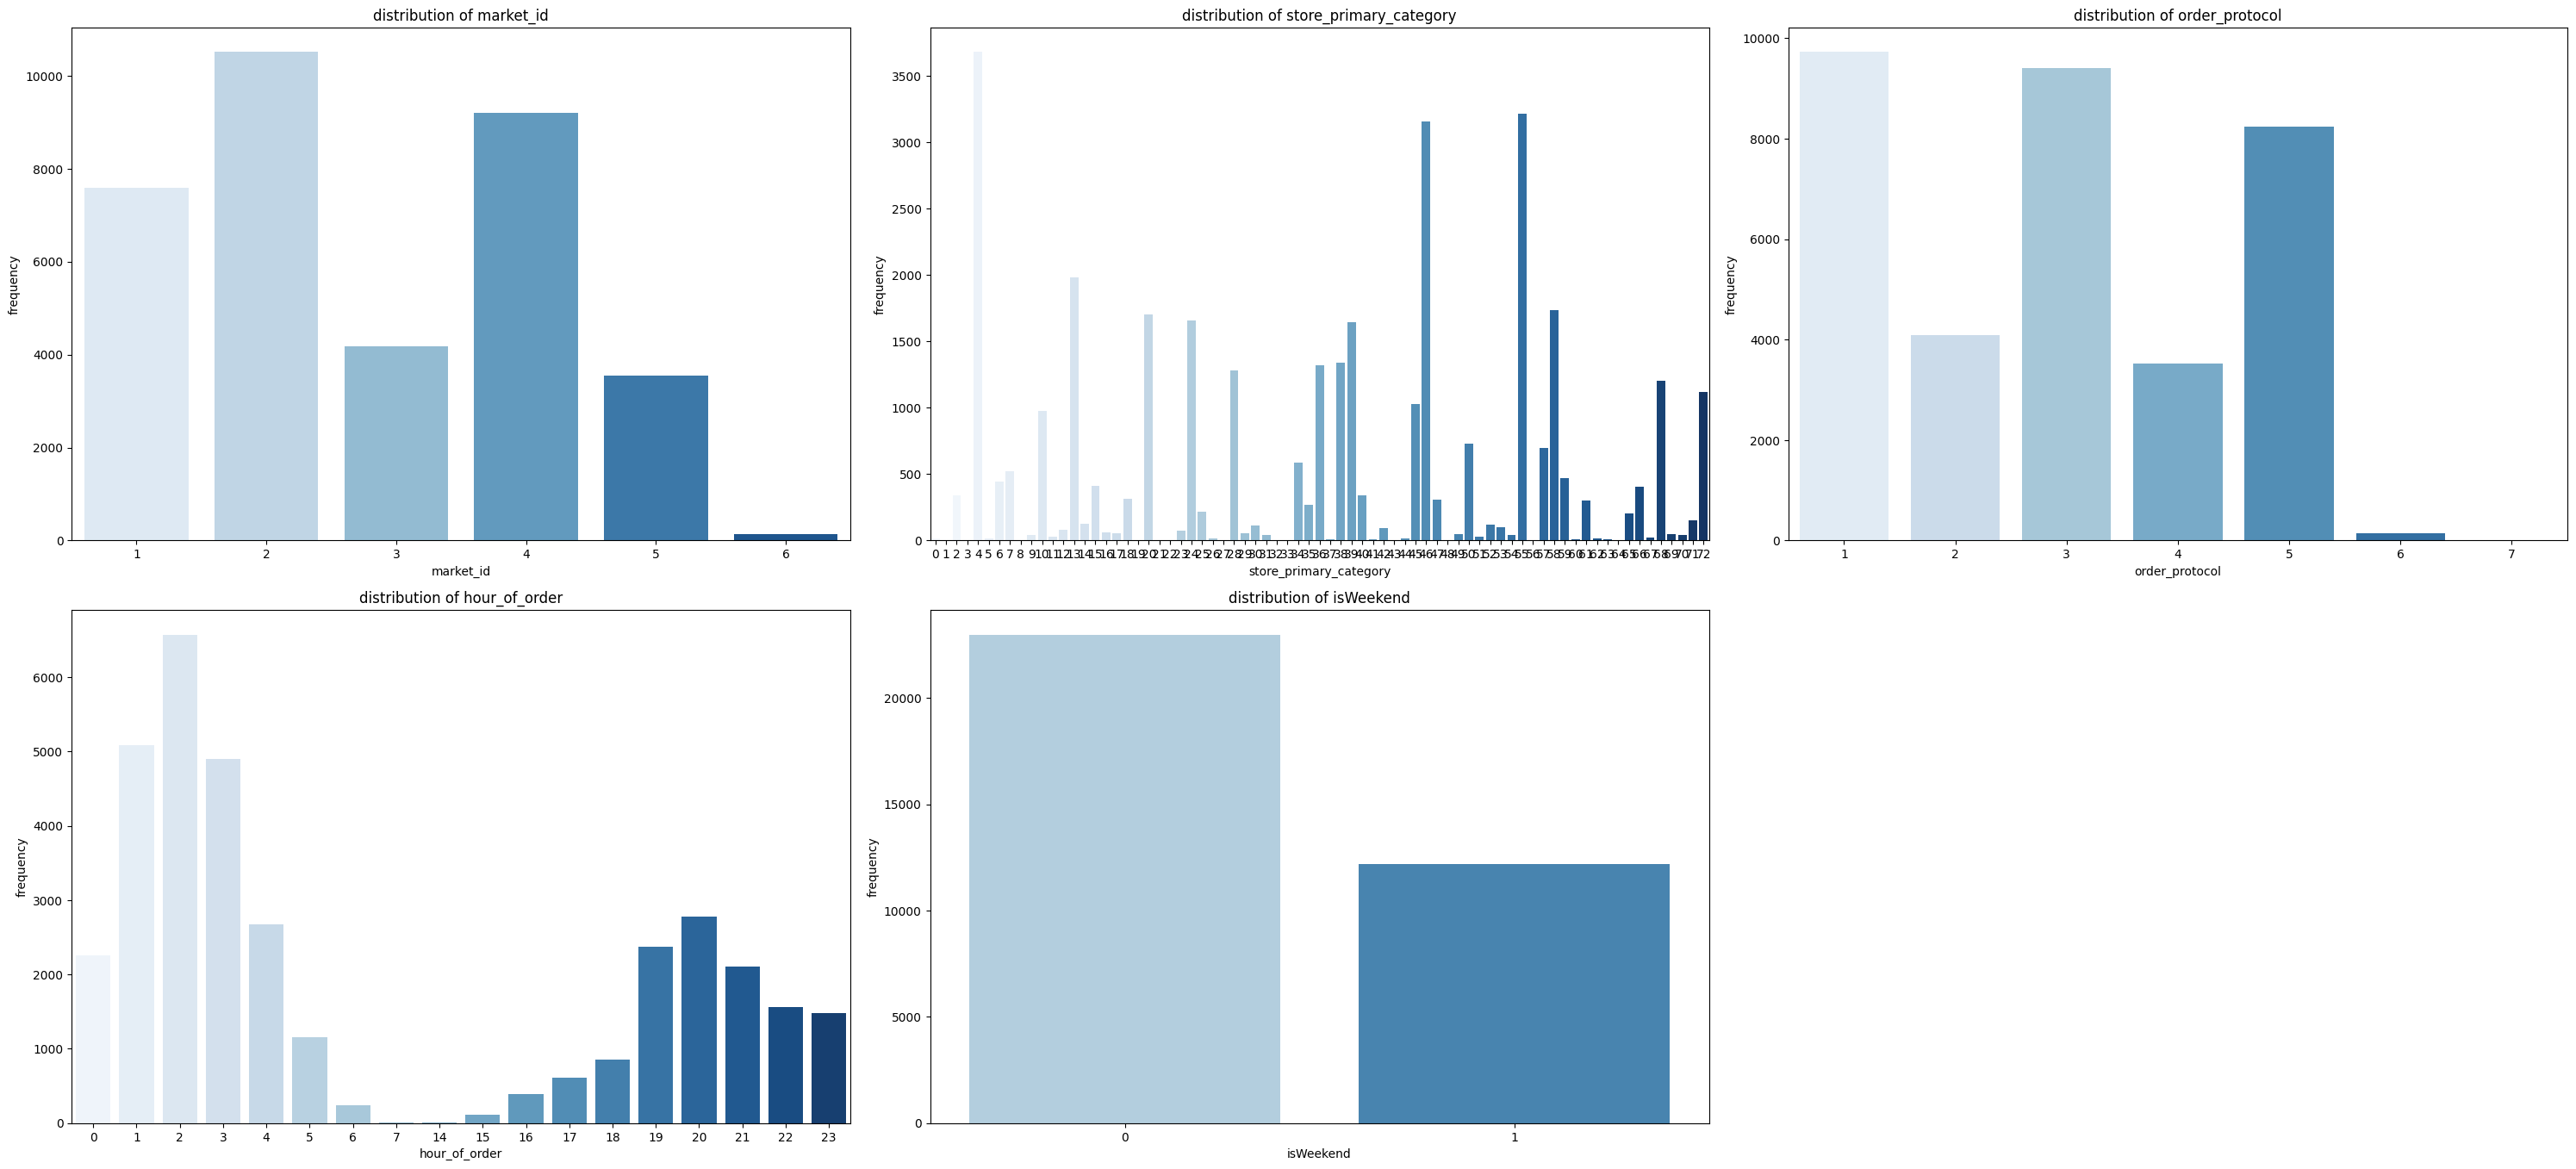

In [131]:
# Distribution of categorical columns

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_test, x=col, palette='Blues')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

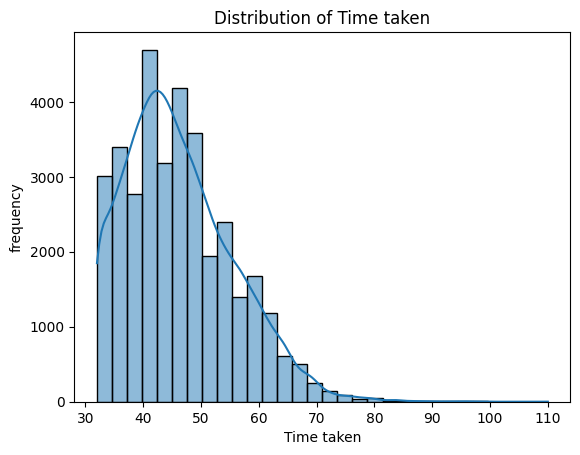

In [132]:
# Distribution of time_taken

sns.histplot(y_test, kde = True, bins = 30)
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

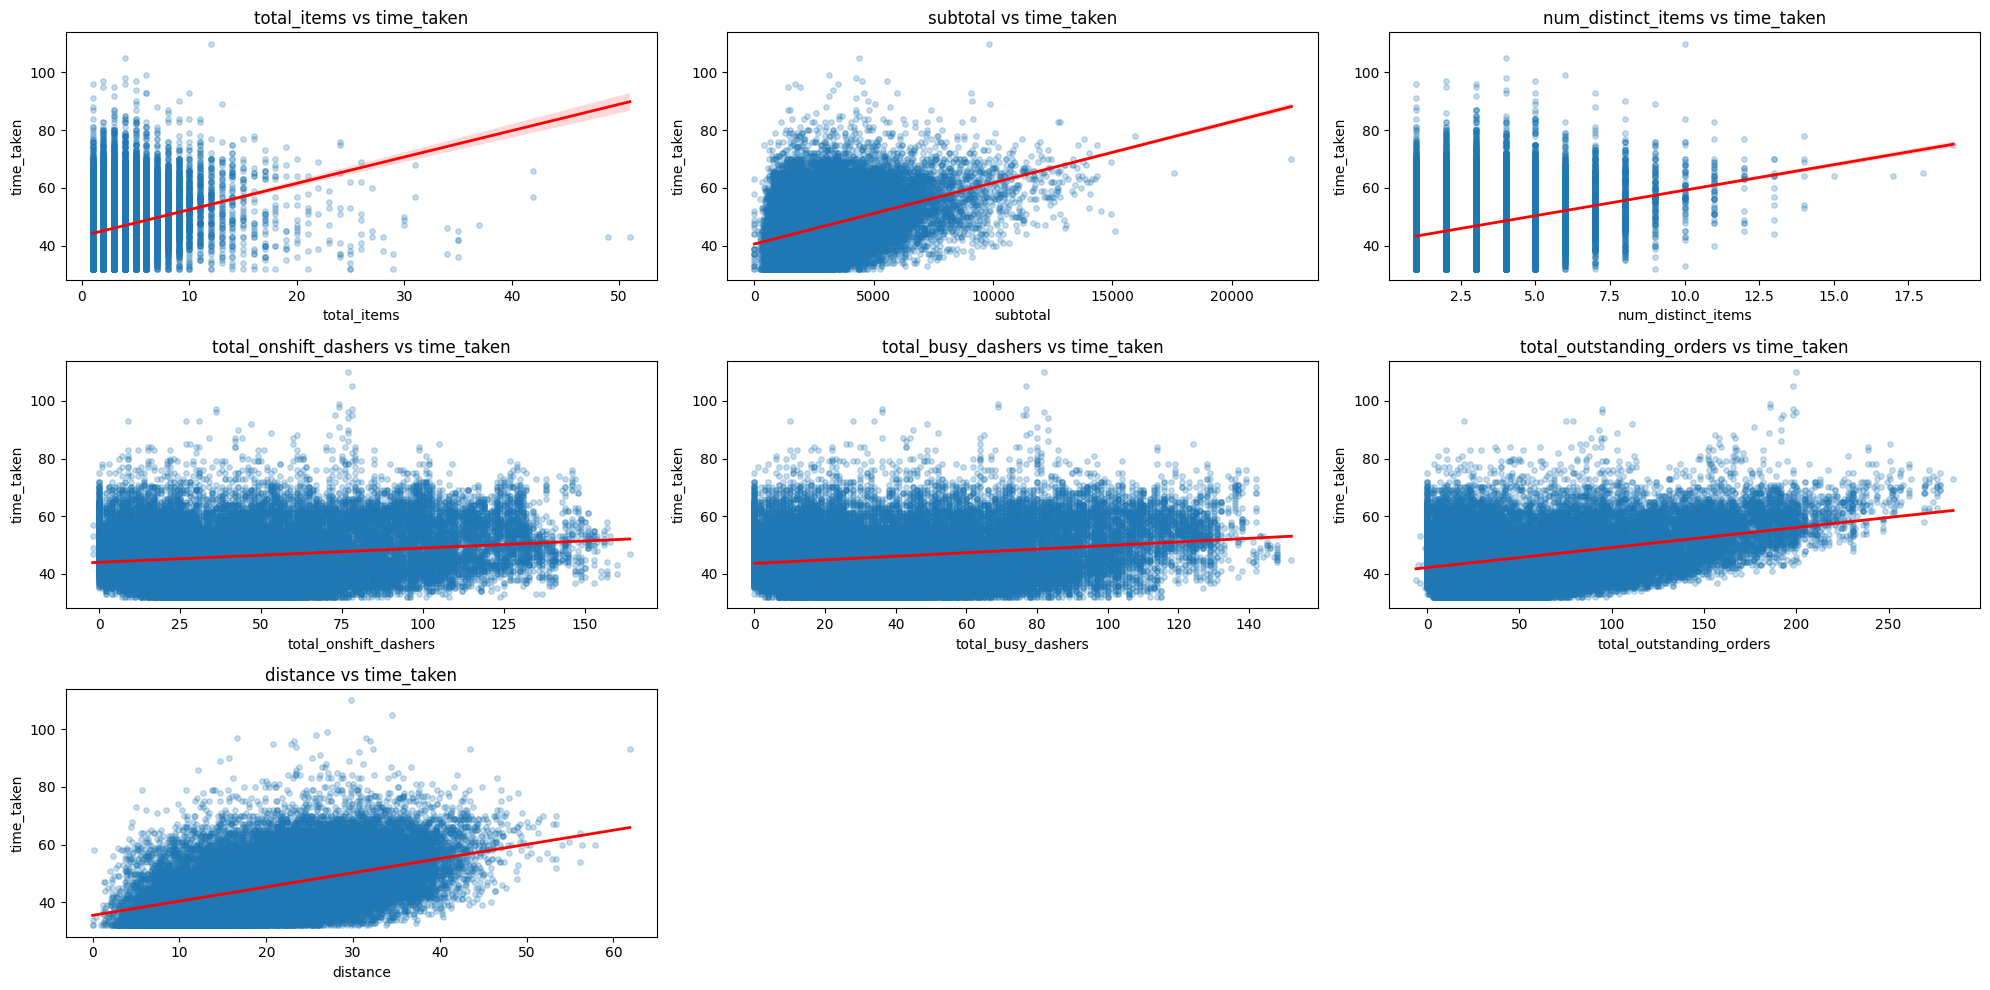

In [133]:
# Scatter plot to visualise the relationship between time_taken and other features
plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_test[col],y = y_test)
    sns.regplot(x = X_test[col], y = y_test, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [134]:
# Drop the weakly correlated columns from training dataset

X_test = X_test.drop(columns = weak_col)

for col, upper in upper_cap.items():
    X_test[col] = X_test[col].clip(upper=upper)
X_test.describe()

total_items      subtotal  num_distinct_items  total_onshift_dashers  \
count  35156.000000  35156.000000        35156.000000           35156.000000   
mean       3.155166   2681.405114            2.664922              44.730089   
std        2.157123   1749.042267            1.560160              34.283463   
min        1.000000      0.000000            1.000000              -2.000000   
25%        2.000000   1404.000000            1.000000              17.000000   
50%        3.000000   2238.000000            2.000000              37.000000   
75%        4.000000   3415.000000            3.000000              65.000000   
max       12.000000   9489.200000            8.000000             136.000000   

       total_busy_dashers  total_outstanding_orders      distance  \
count        35156.000000              35156.000000  35156.000000   
mean            41.829446                 58.016868     21.850121   
std             32.097912                 52.274561      8.654638   
min              0.000000                 -6.000000      0.000000   
25%             15.000000                 17.000000     15.360000   
50%             34.000000                 41.000000     21.840000   
75%             63.000000                 85.000000     28.160000   
max            126.000000                213.000000     41.840000   

       hour_of_order  
count   35156.000000  
mean        8.473746  
std         8.676612  
min         0.000000  
25%         2.000000  
50%         3.000000  
75%        19.000000  
max        23.000000

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [135]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [136]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()


In [137]:
angle_train = 2 * np.pi * X_train['hour_of_order'] / 24
X_train['hour_sin'] = np.sin(angle_train)
X_train['hour_cos'] = np.cos(angle_train)


X_train.drop(columns=['hour_of_order'], inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1    1350.0                   1                     23   
58452             5    4285.0                   5                    112   
20644             6    7880.0                   3                     80   
79735             3    3660.0                   3                    127   
167933            5    8575.0                   5                     44   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111                   20                        19      9.60         0   
58452                  100                       207     34.56         1   
20644                   79                       115     34.92         0   
79735                  106                       173     25.76         1   
167933                  44                        61     17.72         0   

        hour_sin  hour_cos  
42111  -0.866025  0.500000  
58452   0.500000  0.866025  
20644   0.707107  0.707107  
79735   0.500000  0.866025  
167933  0.500000  0.866025

In [ ]:
num_var.extend(['hour_sin','hour_cos'])


In [ ]:
# Apply scaling to the numerical columns
# using MinMaxScaler for scaling num var

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()


total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111      0.000000  0.142267            0.000000               0.192857   
58452      0.363636  0.451566            0.571429               0.828571   
20644      0.454545  0.830418            0.285714               0.600000   
79735      0.181818  0.385702            0.285714               0.935714   
167933     0.363636  0.903659            0.571429               0.342857   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111             0.190840                  0.114155  0.229446         0   
58452             0.801527                  0.972603  0.826004         1   
20644             0.641221                  0.552511  0.834608         0   
79735             0.847328                  0.817352  0.615679         1   
167933            0.374046                  0.305936  0.423518         0   

        hour_sin  hour_cos  
42111   0.066987  0.732051  
58452   0.750000  0.928203  
20644   0.853553  0.843039  
79735   0.750000  0.928203  
167933  0.750000  0.928203

In [ ]:
X_train.describe()


total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        0.195390       0.282382            0.236706   
std         0.195635       0.184308            0.221763   
min         0.000000       0.000000            0.000000   
25%         0.090909       0.149117            0.000000   
50%         0.181818       0.233950            0.142857   
75%         0.272727       0.359040            0.285714   
max         1.000000       1.000000            1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean                0.349043            0.357192                  0.292314   
std                 0.245196            0.244045                  0.237290   
min                 0.000000            0.000000                  0.000000   
25%                 0.150000            0.152672                  0.105023   
50%                 0.292857            0.305344                  0.214612   
75%                 0.500000            0.511450                  0.415525   
max                 1.000000            1.000000                  1.000000   

            distance       hour_sin       hour_cos  
count  140621.000000  140621.000000  140621.000000  
mean        0.521096       0.534290       0.826150  
std         0.207185       0.329134       0.174115  
min         0.000000       0.000000       0.000000  
25%         0.366157       0.146447       0.732051  
50%         0.520076       0.629410       0.843039  
75%         0.672084       0.853553       0.981740  
max         1.000000       1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [150]:

angle_test = 2 * np.pi * X_test['hour_of_order'] / 24
X_test['hour_sin'] = np.sin(angle_test)
X_test['hour_cos'] = np.cos(angle_test)
X_test.drop(columns='hour_of_order', inplace=True)

In [151]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
139667     0.181818  0.136471            0.142857               0.450000   
80077      0.090909  0.310880            0.000000               0.157143   
41872      0.000000  0.147009            0.000000               0.228571   
165269     0.090909  0.312671            0.142857               0.914286   
151215     0.181818  0.131729            0.142857               0.307143   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
139667            0.488550                  0.305936  0.491396         0   
80077             0.167939                  0.100457  0.306883         1   
41872             0.244275                  0.232877  0.401530         0   
165269            1.000000                  0.940639  0.454111         1   
151215            0.267176                  0.178082  0.638623         1   

        hour_sin  hour_cos  
139667  0.853553  0.843039  
80077   0.629410  0.981740  
41872   0.853553  0.843039  
165269  0.853553  0.843039  
151215  0.250000  0.928203

In [152]:
# Create/Initialise the model
lr = LinearRegression()

In [153]:
# Train the model using the training data
lr = lr.fit(X_train, y_train)

In [154]:
# Make predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [155]:
# Find results for evaluation metrics
print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,  y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))


Train MAE : 2.7004286369664423
Test  MAE : 2.6800140199276408
Train RMSE: 3.663253440801591
Test  RMSE: 3.641612281297511
Train R²  : 0.8456307709518166
Test  R²  : 0.8480501376837216


In [ ]:
# getting adjusted r sq for good evaluation

def adj_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train, p = X_train.shape
n_test      = X_test.shape[0]

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

print(f"Train Adj R²: {adj_r2(r2_train, n_train, p):.3f}")
print(f"Test  Adj R²: {adj_r2(r2_test,  n_test,  p):.3f}")


Train Adj R²: 0.846
Test  Adj R²: 0.848


In [157]:
X_train_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_sm).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 7.703e+04
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:46:41   Log-Likelihood:            -3.8211e+05
No. Observations:              140621   AIC:                         7.642e+05
Df Residuals:                  140610   BIC:                         7.643e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [158]:
# Loop through the number of features and test the model

results = []

# Total number of features
n_total = X_train.shape[1]

# selecting 7 features
for k in range(n_total, 6, -1):  
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=k)
    rfe.fit(X_train, y_train)
    
    selected_features = X_train.columns[rfe.support_]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test[selected_features])
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    
    results.append((k, list(selected_features), r2, rmse))

# Print results
for k, features, r2, rmse in results:
    print(f"{k} features | R² = {r2:.4f} | RMSE = {rmse:.2f} | Features: {features}")

10 features | R² = 0.8481 | RMSE = 13.26 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'hour_sin', 'hour_cos']
9 features | R² = 0.8438 | RMSE = 13.63 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
8 features | R² = 0.8434 | RMSE = 13.67 | Features: ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
7 features | R² = 0.8416 | RMSE = 13.82 | Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']


In [159]:
# Build the final model with selected number of features

final_col = ['subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance','hour_sin','hour_cos']
X_train_final = X_train[final_col]
X_test_final = X_test[final_col]

fm = LinearRegression()

fm = fm.fit(X_train_final, y_train)

y_train_pred = fm.predict(X_train_final)
y_test_pred = fm.predict(X_test_final)

# results for evaluation metrics

print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))

Train MAE : 2.7876459386506665
Test  MAE : 2.7717412421547154
Train RMSE: 3.7336011997359
Test  RMSE: 3.7176200725582276
Train R²  : 0.8396449440503757
Test  R²  : 0.8416409420465836


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

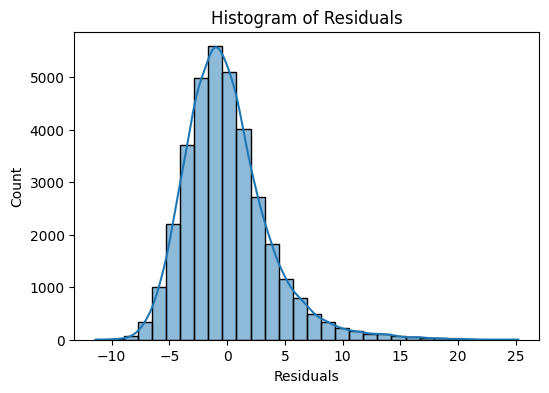

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred

# residuals histogram

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


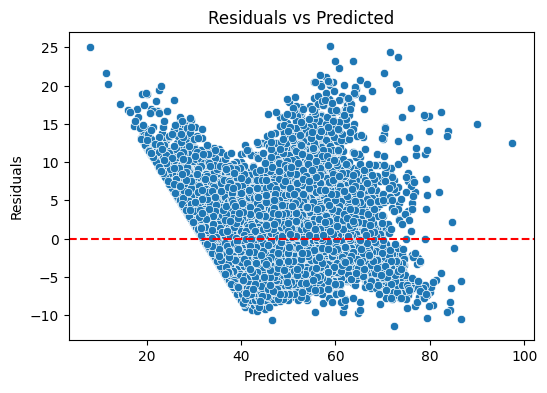

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


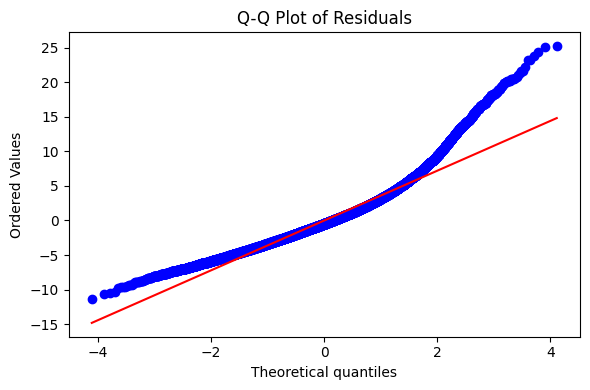

In [162]:

import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif = round(vif.sort_values(by = 'VIF', ascending = False),2)
print(vif)

                    Feature    VIF
1     total_onshift_dashers  37.63
2        total_busy_dashers  36.07
3  total_outstanding_orders  26.36
6                  hour_cos  11.92
4                  distance   6.03
5                  hour_sin   4.65
0                  subtotal   3.42


Your inferences here:
The final linear regression model, developed using seven key features, explains approximately 84% of the variance in delivery times and maintains a mean absolute error (MAE) of around 2.8 minutes. The model's performance is consistent across both the training and test datasets, indicating strong generalization and no signs of overfitting.

During the model evaluation, I identified high multicollinearity between certain dasher-related variables—specifically, the number of dashers on shift and the number already engaged in deliveries. While this multicollinearity does not impact the model’s predictive accuracy, it does reduce the interpretability of individual feature coefficients.

Overall, the model demonstrates robustness and reliability, making it well-suited for real-world deployment in predicting delivery times accurately and consistently.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [164]:
# Compare the scaled vs unscaled features used in the final model

# scaled coefficients 
coef = pd.Series(ols.params).drop('const')

scaled_features = ['total_items', 'subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'distance']

# range for scaled features
range_diff = X[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

# unscaled impact
unscaled_impact = coef[scaled_features] * range_diff['range']

final_df = pd.DataFrame({'Feature': coef.index, 'Scaled Coef': coef.values})

# range and unscaled impact
final_df['Range'] = final_df['Feature'].map(range_diff['range'].round(2))
final_df['Unscaled Impact'] = final_df['Feature'].map(unscaled_impact.round(2))

final_df

Feature  Scaled Coef     Range  Unscaled Impact
0               total_items    -2.049131    410.00          -840.14
1                  subtotal    15.708633  26800.00        420991.38
2        num_distinct_items     3.851138       NaN              NaN
3     total_onshift_dashers   -52.403171    175.00         -9170.55
4        total_busy_dashers   -20.210625       NaN              NaN
5  total_outstanding_orders    79.442492    291.00         23117.77
6                  distance    20.115422     83.52          1680.04
7                 isWeekend     1.199864       NaN              NaN
8                  hour_sin     4.805411       NaN              NaN
9                  hour_cos     3.177907       NaN              NaN

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [165]:
# Analyze the effect of a unit change in a feature, say 'total_items'

fdf = final_df[~final_df['Range'].isna()]

# unit change impact
fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(4)

fdf[['Feature', 'Scaled Coef', 'Range', 'Unit_change_impact']]

Feature  Scaled Coef     Range  Unit_change_impact
0               total_items    -2.049131    410.00             -0.0050
1                  subtotal    15.708633  26800.00              0.0006
3     total_onshift_dashers   -52.403171    175.00             -0.2994
5  total_outstanding_orders    79.442492    291.00              0.2730
6                  distance    20.115422     83.52              0.2408

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the final dataset—refined through manual selection and VIF-based filtering—includes three categorical variables:

1. order_protocol: This variable has a negative coefficient of -0.7, indicating that higher protocol values are associated with shorter delivery times.

2. hours_of_order: Also showing a negative coefficient of -0.26, this suggests that orders placed later in the day tend to be delivered faster.

3. is_weekend: This variable has a positive coefficient of 1.18, meaning that deliveries generally take longer on weekends compared to weekdays.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>Setting test_size = 0.2 means that 20% of the dataset will be allocated to the test set, while the remaining 80% will be used for training the model.

For instance, if the dataset contains 100 records, this split would result in 80 records for training and 20 for testing.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>The heatmap reveals that distance has the strongest correlation with the target variable delivery time, exhibiting a positive correlation coefficient of 0.46. This indicates that, in general, longer distances are associated with longer delivery times.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used boxplots to visualize the distribution of key features and identify extreme values—specifically those lying outside the interquartile range (IQR) or beyond the whiskers of the boxplot, which could potentially skew the model.

To handle these outliers, I applied capping at the 99th percentile. This involved replacing any values above the 99th percentile with the 99th percentile value itself, effectively limiting the impact of extreme values while preserving the overall structure of the data.





---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Among the features, total_outstanding_orders has the highest coefficient (71.09), indicating that an increase in the number of outstanding orders has a significant impact on delivery time.

>The next most influential feature is distance, with a coefficient of 19.99, suggesting that longer delivery distances lead to increased delivery times.

>Additionally, subtotal has a coefficient of 15.20, showing that larger order amounts are generally associated with longer delivery times, possibly due to increased preparation or packaging requirements.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>1. Linear Regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features by assuming a linear relationship between them. In its simplest form, it fits a straight line to the data using the equation y = b0+b1*x where 
b0 is the intercept, b1 is the slope, and ϵ is the error term. 
>2. In multiple linear regression, this extends to include multiple predictors. The model learns by minimizing the Mean Squared Error (MSE) between predicted and actual values, typically using Ordinary Least Squares (OLS). Key assumptions include linearity, independence of observations, homoscedasticity (constant variance of errors), no multicollinearity among features, and normally distributed residuals. Performance is evaluated using metrics like R², adjusted R², MAE, MSE, and RMSE. Linear regression is best used when the relationship is approximately linear, the dataset is not overly complex, and interpretability of feature impact is important.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The primary difference between simple linear regression and multiple linear regression lies in the number of predictor variables used to estimate the target variable.

>Simple Linear Regression involves a single independent variable and models the relationship with the target as a straight line.
Example: Predicting house prices based solely on the size of the house.

>Multiple Linear Regression, on the other hand, involves two or more independent variables and models the relationship as a hyperplane in multi-dimensional space.
Example: Predicting house prices based on size, location, and number of rooms.

>This makes multiple linear regression more suitable for capturing the influence of multiple factors on the outcome.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function (also known as the loss function) in linear regression is a mathematical tool used to measure the difference between predicted values and actual values. The most commonly used cost functions are the Residual Sum of Squares (RSS) or the Mean Squared Error (MSE), both of which compute the squared differences between the predicted and actual outcomes. To minimize this error, optimization techniques are applied. The most widely used method is Gradient Descent, which iteratively adjusts the model’s coefficients in the direction that reduces the cost. Another popular approach is Ordinary Least Squares (OLS), which provides a direct, analytical solution to estimate the optimal coefficients that minimize the error.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model becomes overly complex—often by including too many variables or parameters—and starts to memorize the training data, including its noise and outliers. This leads to high accuracy on training data but poor performance on unseen test data, as the model fails to generalize well. In contrast, underfitting happens when the model is too simplistic to capture the underlying patterns in the data, resulting in low accuracy on both training and test sets due to insufficient learning.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Linear regression relies on several key assumptions, and residual plots are essential tools for verifying whether these assumptions hold or are violated.

>Residuals vs. Predicted Values (for Homoscedasticity):
This plot checks whether the residuals have constant variance across all levels of predicted values. A random scatter around the horizontal axis supports the assumption of homoscedasticity. However, a funnel-shaped pattern, as seen in our model, suggests heteroscedasticity, indicating a violation of this assumption.

>Histogram or Q-Q Plot (for Normality of Residuals):
A histogram helps determine if residuals follow a normal distribution, ideally showing a bell-shaped curve. A Q-Q plot further confirms this by comparing residuals to a theoretical normal distribution—points lying on a straight line indicate normality. In our case, both plots reveal deviations from normality, suggesting a slight skew in the residuals.

>Residuals vs. Predicted Values (for Linearity):
This same plot also helps evaluate the linearity assumption. A random distribution of residuals implies that the relationship between predictors and the target is linear. However, our plot displays a distinct pattern, indicating potential non-linearity in the data.